## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor

## Converting Data to Pandas DataFrame

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')

## Reading the first 5 rows

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Getting data information using describe and info

In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


##  Plotting the data

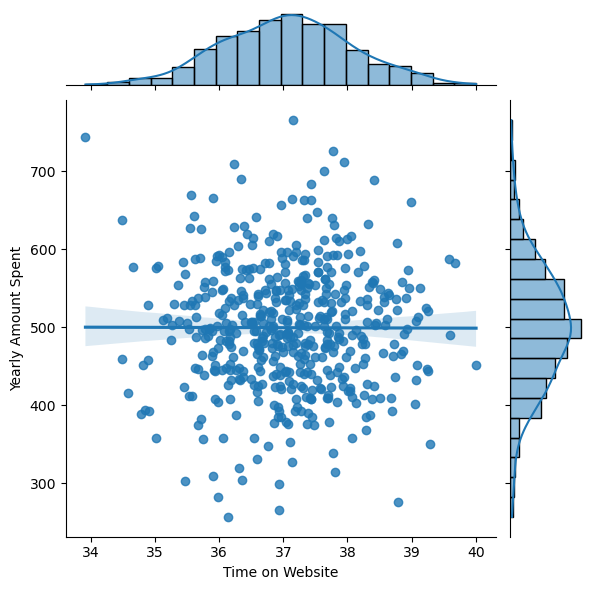

In [6]:
sns.jointplot(data=df, x="Time on Website", y="Yearly Amount Spent", kind="reg")
plt.show()

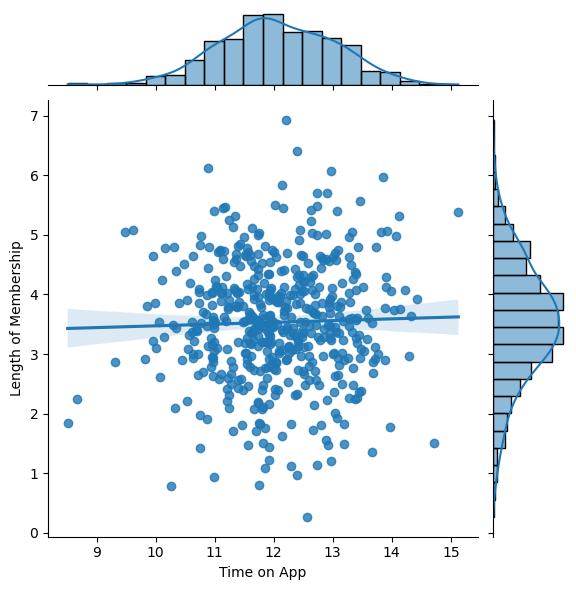

In [7]:
sns.jointplot(data=df, x="Time on App", y="Length of Membership", kind="reg")
plt.show()

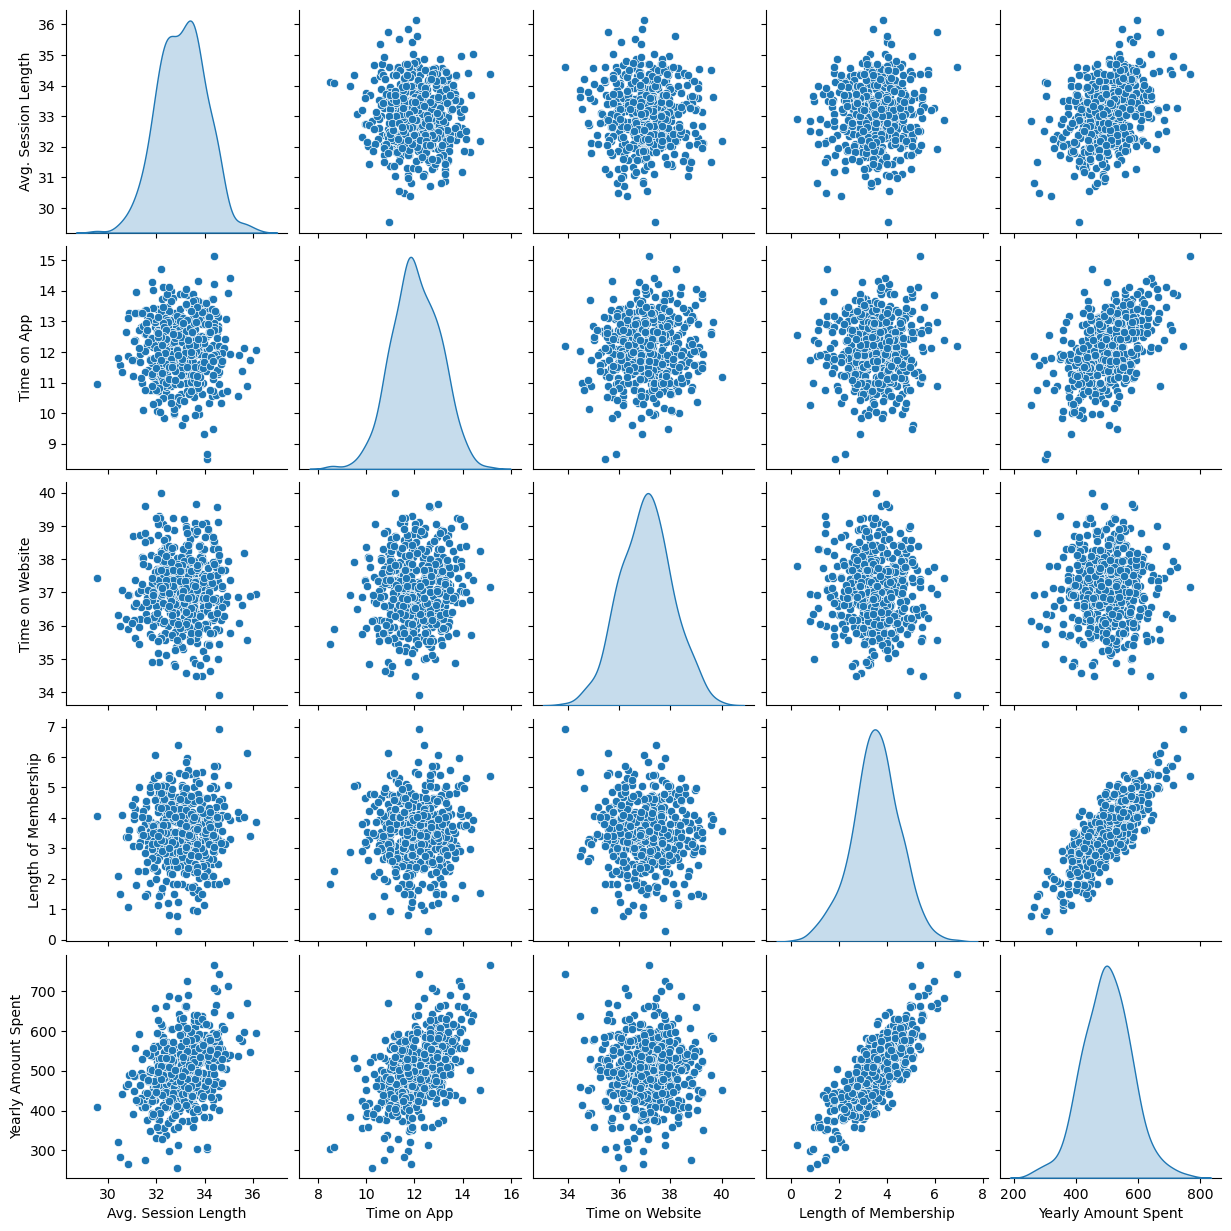

In [8]:
sns.pairplot(data=df, diag_kind = 'kde')
plt.show()

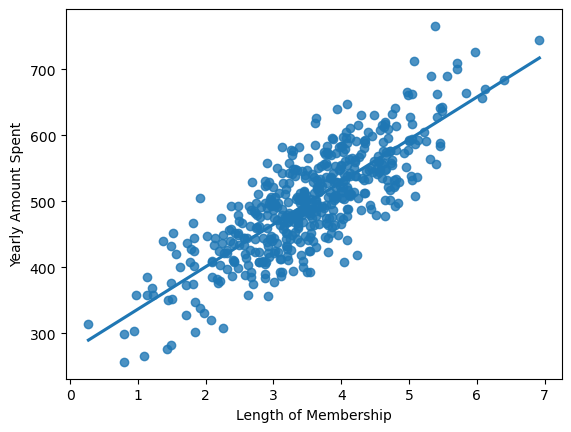

In [9]:
sns.regplot(data=df, x="Length of Membership", y="Yearly Amount Spent", ci=None)
plt.show()

## Training the dataset

In [10]:
X = df.drop(['Yearly Amount Spent', 'Email', 'Address', 'Avatar'], axis=1)
y = df['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Finding prediction, coefficients and score using LinearRegression()

In [11]:
lr = LinearRegression().fit(X_train,y_train)

In [12]:
pd.DataFrame(zip(X.columns, lr.coef_))

,0,1
0,Avg. Session Length,25.540333
1,Time on App,38.756677
2,Time on Website,0.095358
3,Length of Membership,61.395478


### Clearly the time on app has a much higher coefficient than the time on the website, meaning it influences a lot more our target. A focus on the app can help increase the values.

In [13]:
lr.intercept_

-1032.4048272666016

In [14]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.9862104585031302

In [15]:
print('MSE: ', mean_squared_error(y_test,y_pred))
print('MAE: ', mean_absolute_error(y_test,y_pred))
print('RMSE: ', (np.sqrt(mean_squared_error(y_test,y_pred))))
print('R2 Score:' , str(round(r2_score(y_test, y_pred) * 100)) + '%')

MSE:  84.17911922645058
MAE:  7.450059825799415
RMSE:  9.174917941128987
R2 Score: 99%


## Finding scores using CatBoostRegressor

In [21]:
model = CatBoostRegressor(iterations = 6542, learning_rate = 0.02, loss_function = 'RMSE')

In [33]:
# model.fit(X_train,y_train,eval_set= (X_test,y_test),) hiding results (too long)

In [29]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,pred)))
r2 = r2_score(y_test,pred)

In [30]:
print('MSE: ', mean_squared_error(y_test,pred))
print('MAE: ', mean_absolute_error(y_test,pred))
print('RMSE: ', rmse)
print('R2 Score:' , str(round(r2_score(y_test, pred) * 100)) + '%')

MSE:  219.41178083745407
MAE:  10.725174838054881
RMSE:  14.812554838293565
R2 Score: 96%


## Plotting the scores

(array([2., 3., 4., 3., 6., 5., 6., 3., 9., 1., 6., 7., 5., 4., 7., 6., 5.,
        1., 2., 2., 2., 1., 2., 2., 0., 2., 1., 0., 2., 1.]),
 array([384.02256739, 394.44480081, 404.86703422, 415.28926764,
        425.71150105, 436.13373447, 446.55596788, 456.9782013 ,
        467.40043471, 477.82266813, 488.24490154, 498.66713496,
        509.08936837, 519.51160179, 529.9338352 , 540.35606862,
        550.77830203, 561.20053545, 571.62276886, 582.04500228,
        592.46723569, 602.8894691 , 613.31170252, 623.73393593,
        634.15616935, 644.57840276, 655.00063618, 665.42286959,
        675.84510301, 686.26733642, 696.68956984]),
 <BarContainer object of 30 artists>)

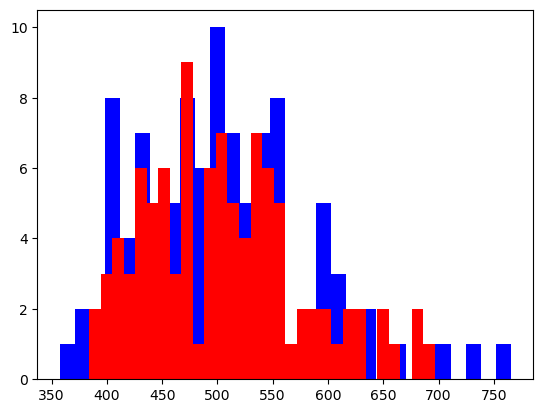

In [31]:
plt.hist(y_test, bins=30,color= 'b')
plt.hist(pred, bins=30, color= 'r')

(array([ 2.,  0.,  4.,  5.,  7.,  4.,  7.,  8.,  6.,  5., 10.,  5.,  5.,
         8.,  6.,  3.,  2.,  2.,  3.,  1.,  2.,  0.,  1.,  1.,  1.,  0.,
         1.,  0.,  0.,  1.]),
 array([366.65965982, 379.95435107, 393.24904231, 406.54373356,
        419.83842481, 433.13311606, 446.42780731, 459.72249856,
        473.0171898 , 486.31188105, 499.6065723 , 512.90126355,
        526.1959548 , 539.49064605, 552.78533729, 566.08002854,
        579.37471979, 592.66941104, 605.96410229, 619.25879354,
        632.55348478, 645.84817603, 659.14286728, 672.43755853,
        685.73224978, 699.02694102, 712.32163227, 725.61632352,
        738.91101477, 752.20570602, 765.50039727]),
 <BarContainer object of 30 artists>)

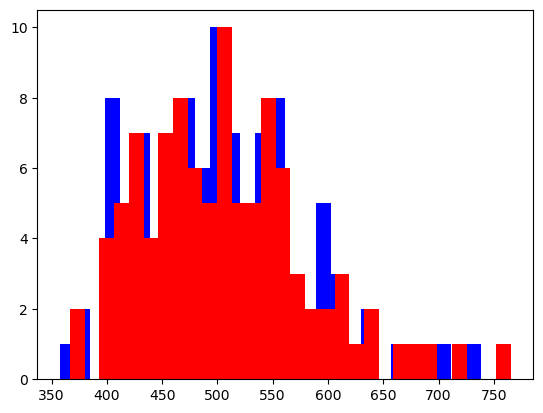

In [32]:
plt.hist(y_test, bins=30, color='b')
plt.hist(y_pred, bins=30, color= 'r')